In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC

# Modelo sem resampling de dados

In [3]:
#importa base train e base test
data_train = pd.read_csv('/content/drive/MyDrive/cidamo/dadosTrain.csv')
data_test = pd.read_csv('/content/drive/MyDrive/cidamo/dadosTest.csv')

In [4]:
#visualizar cabecalho treino
data_train.head()

,Unnamed: 0,X,date,time,cc_num,merchant,category,amt,first,last,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,sec,faixascategory,faixasjob,faixascity,distGeo
0,1,0,2019-01-01,00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,18,9,2,1,78773.820754
1,2,1,2019-01-01,00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,44,8,2,1,30216.618410
2,3,2,2019-01-01,00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,51,1,4,1,108102.911712
3,4,3,2019-01-01,00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,76,2,3,7,95685.115476
4,5,4,2019-01-01,00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,186,1,1,1,77702.395165


In [5]:
#visualizar cabecalho teste
data_test.head()

,Unnamed: 0,Unnamed: 0.1,X,date,time,cc_num,merchant,category,amt,first,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,sec,faixascategory,faixasjob,faixascity,distGeo
0,0,1,0,2020-06-21,12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,...,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,44065,1,3.0,3.0,24613.746071
1,1,2,1,2020-06-21,12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,...,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,44073,1,2.0,3.0,104834.043428
2,2,3,2,2020-06-21,12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,...,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,44093,1,2.0,2.0,59204.795631
3,3,4,3,2020-06-21,12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,...,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,44115,1,3.0,1.0,27615.117073
4,4,5,4,2020-06-21,12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,...,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,44117,1,3.0,2.0,104423.174625


In [6]:
atributes = ['unix_time','amt', 'gender', 'sec', 'faixascategory', 'faixasjob', 'faixascity', 'distGeo']

## Modelo sem resampling de dados com parâmetros default

In [7]:
#definicao variaveis
X_train = data_train[atributes]
y_train = data_train['is_fraud']
X_test = data_test[atributes]
y_test = data_test['is_fraud']

#construcao do modelo
model = RandomForestClassifier()

#treinando o modelo
model = model.fit(X_train, y_train)
model

#dados de teste para o modelo
y_predict = model.predict(X_test)

In [8]:
#comparando gabarito e previsoes da maquina
gabarito = pd.DataFrame({'Gabarito': y_test, 'Previsao': y_predict})
gabarito

,Gabarito,Previsao
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
555579,0,0
555580,0,0
555581,0,0
555582,0,0


In [9]:
#importancia das variaveis
for atribute,importance in zip(X_train.columns,model.feature_importances_):
    print("{}:{}".format(atribute, importance))

unix_time:0.07940552864411209
amt:0.40093247222864636
gender:0.01374957963148899
sec:0.15783339200728902
faixascategory:0.16471279527201935
faixasjob:0.021888659067244923
faixascity:0.08984120629215232
distGeo:0.07163636685704694


Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.55      0.15      0.23      2010

    accuracy                           1.00    555584
   macro avg       0.77      0.57      0.61    555584
weighted avg       1.00      1.00      1.00    555584


Confusion Matrix :
 [[553332    242]
 [  1717    293]]

Acuracia: 0.9964739805321967

ROC AUC: 0.9395440212867675 



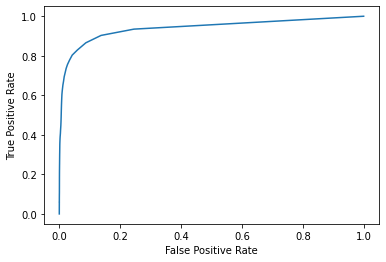

In [10]:
#metricas
print('Classification metrics: \n', metrics.classification_report(y_test,y_predict))
print('\nConfusion Matrix :\n', confusion_matrix(y_test, y_predict))
print('\nAcuracia:', accuracy_score(y_test, y_predict))

y_predict_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
print('\nROC AUC:', metrics.roc_auc_score(y_test, y_predict_proba),'\n')

#curva ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## Modelo sem resampling de dados com determinação de parâmetros

In [11]:
#definicao variaveis
X_train = data_train[atributes]
y_train = data_train['is_fraud']
X_test = data_test[atributes]
y_test = data_test['is_fraud']

#construcao do modelo
model = RandomForestClassifier(random_state = 42)

#parametros
param_grid = { 
    'n_estimators': [20,50,100,200], 
    'max_depth': [3,5,10,None]
}

#criacao do objeto do GridSearchCV
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)

#treinando o grid
CV_model.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [20, 50, 100, 200]})

In [12]:
#imprimindo os parametros que produziram o "best score"
CV_model.best_params_

{'max_depth': 3, 'n_estimators': 200}

In [26]:
#construcao do modelo com os parametros
model1=RandomForestClassifier(random_state=42, n_estimators=200, max_depth=3)

#treinando o modelo com os parametros
model1.fit(X_train, y_train)

#dados de teste para o modelo
y_predict = model1.predict(X_test)

In [27]:
#comparando gabarito e previsoes da maquina
gabarito = pd.DataFrame({'Gabarito': y_test, 'Previsao': y_predict})
gabarito

,Gabarito,Previsao
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
555579,0,0
555580,0,0
555581,0,0
555582,0,0


In [28]:
#importancia das variaveis
for atribute,importance in zip(X_train.columns,model1.feature_importances_):
    print("{}:{}".format(atribute, importance))

unix_time:0.006570793582134958
amt:0.5603332258503848
gender:0.001326738743641591
sec:0.18412299588835015
faixascategory:0.11658722761153432
faixasjob:0.04280943296325915
faixascity:0.08799717192376277
distGeo:0.0002524134369322185


Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.06      0.51      0.10      2010

    accuracy                           0.97    555584
   macro avg       0.53      0.74      0.54    555584
weighted avg       0.99      0.97      0.98    555584


Confusion Matrix :
 [[536561  17013]
 [   988   1022]]

Acuracia: 0.967599858887225

ROC AUC: 0.8739323277969353 



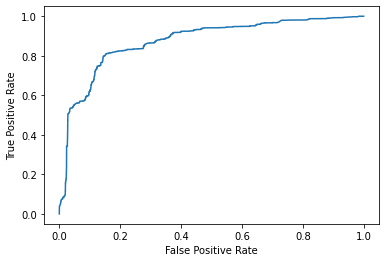

In [29]:
#metricas
print('Classification metrics: \n', metrics.classification_report(y_test,y_predict))
print('\nConfusion Matrix :\n', confusion_matrix(y_test, y_predict))
print('\nAcuracia:', accuracy_score(y_test, y_predict))

y_predict_proba = model1.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
print('\nROC AUC:', metrics.roc_auc_score(y_test, y_predict_proba),'\n')

#curva ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Modelo com Undersample

In [17]:
#importa base
data_undersample = pd.read_csv('/content/drive/MyDrive/cidamo/undersample_data.csv')

data_undersample.head()

,Unnamed: 0,Unnamed: 0.1,X,date,time,cc_num,merchant,category,amt,first,...,trans_num,unix_time,merch_lat,merch_long,sec,faixascategory,faixasjob,faixascity,distGeo,is_fraud
0,0,139927,139926,2019-03-17,13:02:35,3.746560e+14,fraud_O'Connell-Ullrich,home,42.67,David,...,2aeb347cbc394184e79839493e44dbdd,1331989355,39.35497,-76.92628,46955,1,2,2,54983.61,0
1,1,1141767,1141766,2020-04-20,19:06:28,4.474325e+15,fraud_Bode-Schuster,kids_pets,73.18,Matthew,...,281808833ee311a73dc2088a5938c0a1,1366484788,37.98234,-118.52320,68788,1,2,2,54213.63,0
2,2,537100,537099,2019-08-18,17:26:15,3.476126e+14,fraud_Turcotte-Halvorson,misc_pos,9.42,Robert,...,c5d57a7256f69bf85df6c1d90997f6d0,1345310775,45.62884,-69.45333,62775,1,2,6,88951.25,0
3,3,1042000,1041999,2020-03-08,13:41:38,3.518669e+15,fraud_Harris Group,food_dining,47.25,Dorothy,...,a94bde367b4d6ce25405845a9085474e,1362750098,39.31881,-84.00000,49298,1,3,3,26335.22,0
4,4,1143246,1143245,2020-04-21,06:36:15,3.401032e+14,fraud_Pacocha-Bauch,shopping_pos,8.87,Sophia,...,fc68e743749cba32090a109817b32be6,1366526175,35.86145,-80.27019,23775,4,3,3,69396.99,0


In [18]:
#atributos
atributes = ['unix_time','amt', 'gender', 'sec', 'faixascategory', 'faixasjob', 'faixascity', 'distGeo']

## Modelo com Undersample com parâmetros default

In [19]:
#definicao variaveis
X_train = data_undersample[atributes]
y_train = data_undersample['is_fraud']
X_test = data_test[atributes]
y_test = data_test['is_fraud']

#construcao do modelo
model = RandomForestClassifier()

#treinando o modelo
model = model.fit(X_train, y_train)
model

#dados de teste para o modelo
y_predict = model.predict(X_test)

In [20]:
#comparando gabarito e previsoes da maquina
gabarito = pd.DataFrame({'Gabarito': y_test, 'Previsao': y_predict})
gabarito

,Gabarito,Previsao
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
555579,0,0
555580,0,1
555581,0,0
555582,0,1


In [21]:
#importancia das variaveis
for atribute,importance in zip(X_train.columns,model.feature_importances_):
    print("{}:{}".format(atribute, importance))

unix_time:0.03924101813943062
amt:0.5267728218249877
gender:0.007098584102445389
sec:0.19594156535755833
faixascategory:0.08997202785462392
faixasjob:0.024692419471358883
faixascity:0.08318271252208101
distGeo:0.033098850727514076


Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.01      0.13      0.02      2010

    accuracy                           0.96    555584
   macro avg       0.50      0.55      0.50    555584
weighted avg       0.99      0.96      0.97    555584


Confusion Matrix :
 [[530385  23189]
 [  1744    266]]

Acuracia: 0.9551228977076374

ROC AUC: 0.8367189844977875 



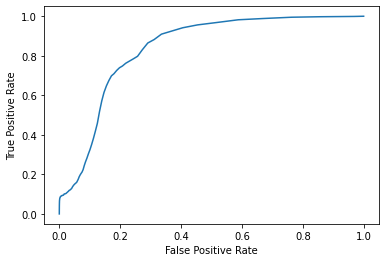

In [22]:
#metricas
print('Classification metrics: \n', metrics.classification_report(y_test,y_predict))
print('\nConfusion Matrix :\n', confusion_matrix(y_test, y_predict))
print('\nAcuracia:', accuracy_score(y_test, y_predict))

y_predict_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
print('\nROC AUC:', metrics.roc_auc_score(y_test, y_predict_proba),'\n')

#curva ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Modelo com Undersample com determinação de parâmetros

In [23]:
#definicao variaveis
X_train = data_undersample[atributes]
y_train = data_undersample['is_fraud']
X_test = data_test[atributes]
y_test = data_test['is_fraud']

#construcao do modelo
model = RandomForestClassifier(random_state = 42)

#parametros
param_grid = { 
    'n_estimators': [20,50,100,200], 
    'max_depth': [3,5,10,None]
}

#criacao do objeto do GridSearchCV
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)

#treinando o grid
CV_model.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [20, 50, 100, 200]})

In [24]:
#imprimindo os parametros que produziram o "best score"
CV_model.best_params_

{'max_depth': 3, 'n_estimators': 20}

In [25]:
#construcao do modelo com os parametros
model1=RandomForestClassifier(random_state=42, n_estimators=20, max_depth=3)

#treinando o modelo com os parametros
model1.fit(X_train, y_train)

#dados de teste para o modelo
y_predict = model1.predict(X_test)

In [30]:
#comparando gabarito e previsoes da maquina
gabarito = pd.DataFrame({'Gabarito': y_test, 'Previsao': y_predict})
gabarito

,Gabarito,Previsao
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
555579,0,0
555580,0,0
555581,0,0
555582,0,0


In [31]:
#importancia das variaveis
for atribute,importance in zip(X_train.columns,model1.feature_importances_):
    print("{}:{}".format(atribute, importance))

unix_time:0.006570793582134958
amt:0.5603332258503848
gender:0.001326738743641591
sec:0.18412299588835015
faixascategory:0.11658722761153432
faixasjob:0.04280943296325915
faixascity:0.08799717192376277
distGeo:0.0002524134369322185


Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.06      0.51      0.10      2010

    accuracy                           0.97    555584
   macro avg       0.53      0.74      0.54    555584
weighted avg       0.99      0.97      0.98    555584


Confusion Matrix :
 [[536561  17013]
 [   988   1022]]

Acuracia: 0.967599858887225

ROC AUC: 0.8739323277969353 



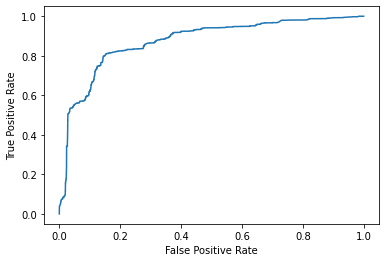

In [32]:
#metricas
print('Classification metrics: \n', metrics.classification_report(y_test,y_predict))
print('\nConfusion Matrix :\n', confusion_matrix(y_test, y_predict))
print('\nAcuracia:', accuracy_score(y_test, y_predict))

y_predict_proba = model1.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
print('\nROC AUC:', metrics.roc_auc_score(y_test, y_predict_proba),'\n')

#curva ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Modelo com Oversample

In [33]:
#importa base
data_oversample = pd.read_csv('/content/drive/MyDrive/cidamo/oversample_data.csv')

data_oversample.head()

,Unnamed: 0,Unnamed: 0.1,X,date,time,cc_num,merchant,category,amt,first,...,trans_num,unix_time,merch_lat,merch_long,sec,faixascategory,faixasjob,faixascity,distGeo,is_fraud
0,0,1,0,2019-01-01,00:00:18,2.703186e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,18,9,2,1,78773.820754,0
1,1,2,1,2019-01-01,00:00:44,6.304233e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,44,8,2,1,30216.618410,0
2,2,3,2,2019-01-01,00:00:51,3.885949e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,51,1,4,1,108102.911712,0
3,3,4,3,2019-01-01,00:01:16,3.534094e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,76,2,3,7,95685.115476,0
4,4,5,4,2019-01-01,00:03:06,3.755342e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,186,1,1,1,77702.395165,0


In [34]:
#atributos
atributes = ['unix_time','amt', 'gender', 'sec', 'faixascategory', 'faixasjob', 'faixascity', 'distGeo']

## Modelo com Oversample com parâmetros default

In [35]:
#definicao variaveis
X_train = data_oversample[atributes]
y_train = data_oversample['is_fraud']
X_test = data_test[atributes]
y_test = data_test['is_fraud']

#construcao do modelo
model = RandomForestClassifier()

#treinando o modelo
model = model.fit(X_train, y_train)
model

#dados de teste para o modelo
y_predict = model.predict(X_test)

In [36]:
#comparando gabarito e previsoes da maquina
gabarito = pd.DataFrame({'Gabarito': y_test, 'Previsao': y_predict})
gabarito

,Gabarito,Previsao
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
555579,0,0
555580,0,0
555581,0,0
555582,0,0


In [37]:
#importancia das variaveis
for atribute,importance in zip(X_train.columns,model.feature_importances_):
    print("{}:{}".format(atribute, importance))

unix_time:0.03486405865084036
amt:0.5281966889935219
gender:0.006346245886756851
sec:0.20043817459571067
faixascategory:0.09583941341422843
faixasjob:0.02975014653738395
faixascity:0.07724504444094295
distGeo:0.027320227480614707


Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.45      0.05      0.09      2010

    accuracy                           1.00    555584
   macro avg       0.72      0.53      0.55    555584
weighted avg       0.99      1.00      0.99    555584


Confusion Matrix :
 [[553446    128]
 [  1907    103]]

Acuracia: 0.9963371875359982

ROC AUC: 0.8739323277969353 



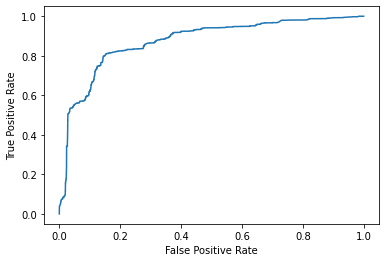

In [38]:
#metricas
print('Classification metrics: \n', metrics.classification_report(y_test,y_predict))
print('\nConfusion Matrix :\n', confusion_matrix(y_test, y_predict))
print('\nAcuracia:', accuracy_score(y_test, y_predict))

y_predict_proba = model1.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
print('\nROC AUC:', metrics.roc_auc_score(y_test, y_predict_proba),'\n')

#curva ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Modelo com Oversample com determinação de parâmetros

In [39]:
#definicao variaveis
X_train = data_undersample[atributes]
y_train = data_undersample['is_fraud']
X_test = data_test[atributes]
y_test = data_test['is_fraud']

#construcao do modelo
model = RandomForestClassifier(random_state = 42)

#parametros
param_grid = { 
    'n_estimators': [20,50,100,200], 
    'max_depth': [3,5,10,None]
}

#criacao do objeto do GridSearchCV
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)

#treinando o grid
CV_model.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [20, 50, 100, 200]})

In [40]:
#imprimindo os parametros que produziram o "best score"
CV_model.best_params_

{'max_depth': 3, 'n_estimators': 20}

In [41]:
#construcao do modelo com os parametros
model1=RandomForestClassifier(random_state=42, n_estimators=20, max_depth=3)

#treinando o modelo com os parametros
model1.fit(X_train, y_train)

#dados de teste para o modelo
y_predict = model1.predict(X_test)

In [42]:
#comparando gabarito e previsoes da maquina
gabarito = pd.DataFrame({'Gabarito': y_test, 'Previsao': y_predict})
gabarito

,Gabarito,Previsao
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
555579,0,0
555580,0,0
555581,0,0
555582,0,0


In [43]:
#importancia das variaveis
for atribute,importance in zip(X_train.columns,model1.feature_importances_):
    print("{}:{}".format(atribute, importance))

unix_time:0.007007241071818996
amt:0.5625684586524434
gender:0.0008810047290350559
sec:0.11547414783974103
faixascategory:0.13913207266417646
faixasjob:0.05118543371856715
faixascity:0.12361373445940517
distGeo:0.0001379068648125754


Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98    553574
           1       0.06      0.54      0.12      2010

    accuracy                           0.97    555584
   macro avg       0.53      0.76      0.55    555584
weighted avg       0.99      0.97      0.98    555584


Confusion Matrix :
 [[537716  15858]
 [   917   1093]]

Acuracia: 0.9698065459048497

ROC AUC: 0.8503514552122421 



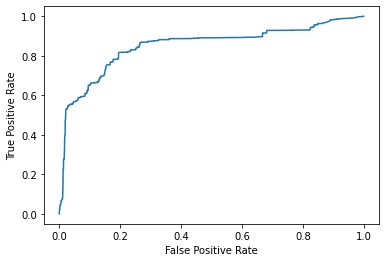

In [44]:
#metricas
print('Classification metrics: \n', metrics.classification_report(y_test,y_predict))
print('\nConfusion Matrix :\n', confusion_matrix(y_test, y_predict))
print('\nAcuracia:', accuracy_score(y_test, y_predict))

y_predict_proba = model1.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
print('\nROC AUC:', metrics.roc_auc_score(y_test, y_predict_proba),'\n')

#curva ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Modelo com SMOTE

In [45]:
#importa base
data_smote = pd.read_csv('/content/drive/MyDrive/cidamo/smote_data.csv')

data_smote.head()

,Unnamed: 0,amt,gender,unix_time,sec,faixascategory,faixasjob,faixascity,distGeo,is_fraud
0,0,4.97,0,1325376018,18,9,2,1,78773.820754,0
1,1,107.23,0,1325376044,44,8,2,1,30216.618410,0
2,2,220.11,1,1325376051,51,1,4,1,108102.911712,0
3,3,45.00,1,1325376076,76,2,3,7,95685.115476,0
4,4,41.96,1,1325376186,186,1,1,1,77702.395165,0


In [47]:
#atributos
atributes = ['unix_time','amt', 'gender', 'sec', 'faixascategory', 'faixasjob', 'faixascity', 'distGeo']

## Modelo com SMOTE com parâmetros default

In [48]:
#definicao variaveis
X_train = data_smote[atributes]
y_train = data_smote['is_fraud']
X_test = data_test[atributes]
y_test = data_test['is_fraud']

#construcao do modelo
model = RandomForestClassifier()

#treinando o modelo
model = model.fit(X_train, y_train)
model

#dados de teste para o modelo
y_predict = model.predict(X_test)

In [49]:
#comparando gabarito e previsoes da maquina
gabarito = pd.DataFrame({'Gabarito': y_test, 'Previsao': y_predict})
gabarito

,Gabarito,Previsao
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
555579,0,0
555580,0,0
555581,0,0
555582,0,0


In [50]:
#importancia das variaveis
for atribute,importance in zip(X_train.columns,model.feature_importances_):
    print("{}:{}".format(atribute, importance))

unix_time:0.05470776014204271
amt:0.49538639909844406
gender:0.014891763382918753
sec:0.1553347061842945
faixascategory:0.16147019790758008
faixasjob:0.0162839720398863
faixascity:0.06968949141264807
distGeo:0.03223570983218551


Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.04      0.07      0.05      2010

    accuracy                           0.99    555584
   macro avg       0.52      0.53      0.52    555584
weighted avg       0.99      0.99      0.99    555584


Confusion Matrix :
 [[549961   3613]
 [  1865    145]]

Acuracia: 0.9901401048266328

ROC AUC: 0.8503514552122421 



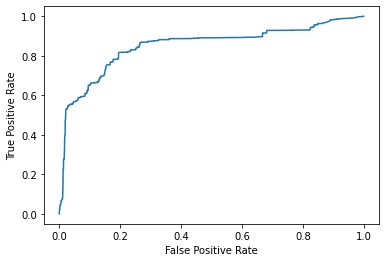

In [51]:
#metricas
print('Classification metrics: \n', metrics.classification_report(y_test,y_predict))
print('\nConfusion Matrix :\n', confusion_matrix(y_test, y_predict))
print('\nAcuracia:', accuracy_score(y_test, y_predict))

y_predict_proba = model1.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
print('\nROC AUC:', metrics.roc_auc_score(y_test, y_predict_proba),'\n')

#curva ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Modelo com SMOTE com determinação de parâmetros

In [52]:
#definicao variaveis
X_train = data_smote[atributes]
y_train = data_smote['is_fraud']
X_test = data_test[atributes]
y_test = data_test['is_fraud']

#construcao do modelo
model = RandomForestClassifier(random_state = 42)

#parametros
param_grid = { 
    'n_estimators': [20,50,100,200], 
    'max_depth': [3,5,10,None]
}

#criacao do objeto do GridSearchCV
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=2)

#treinando o grid
CV_model.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [20, 50, 100, 200]})

In [53]:
#imprimindo os parametros que produziram o "best score"
CV_model.best_params_

{'max_depth': None, 'n_estimators': 20}

In [54]:
#construcao do modelo com os parametros
model1=RandomForestClassifier(random_state=42, n_estimators=20, max_depth=None)

#treinando o modelo com os parametros
model1.fit(X_train, y_train)

#dados de teste para o modelo
y_predict = model1.predict(X_test)

In [55]:
#comparando gabarito e previsoes da maquina
gabarito = pd.DataFrame({'Gabarito': y_test, 'Previsao': y_predict})
gabarito

,Gabarito,Previsao
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
555579,0,0
555580,0,0
555581,0,0
555582,0,0


In [56]:
#importancia das variaveis
for atribute,importance in zip(X_train.columns,model1.feature_importances_):
    print("{}:{}".format(atribute, importance))

unix_time:0.05615959482946966
amt:0.49119308724895727
gender:0.01441299839017767
sec:0.1510374978132134
faixascategory:0.15733109289981492
faixasjob:0.01784013217620761
faixascity:0.07951742983522125
distGeo:0.032508166806938195


Classification metrics: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.03      0.07      0.05      2010

    accuracy                           0.99    555584
   macro avg       0.52      0.53      0.52    555584
weighted avg       0.99      0.99      0.99    555584


Confusion Matrix :
 [[549481   4093]
 [  1863    147]]

Acuracia: 0.9892797488768575

ROC AUC: 0.580206501444876 



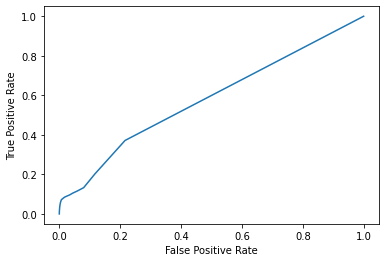

In [57]:
#metricas
print('Classification metrics: \n', metrics.classification_report(y_test,y_predict))
print('\nConfusion Matrix :\n', confusion_matrix(y_test, y_predict))
print('\nAcuracia:', accuracy_score(y_test, y_predict))

y_predict_proba = model1.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_predict_proba)
print('\nROC AUC:', metrics.roc_auc_score(y_test, y_predict_proba),'\n')

#curva ROC
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()